This is a Clustering task which we will perform for "HELP International", which is an international humanitarian NGO and  committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. Here we will categorise the countries using some socio-economic and health factors that determine the overall development of the country then we will suggest the countries which are in direst need of aid to the NGO. This way this analysis will help the "HELP international" take decisions efficiently and spend the money strategically and effectively.

In [1]:
# supress warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Understanding the Data

In [3]:
# import and read the data

help_df = pd.read_csv(r'C:\\Users\\dell\\Desktop\\Machine Learning 1\\6) Clustering Assignment\\Country-data.csv')
help_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Checking the shape

help_df.shape

(167, 10)

So, here we can see that the dataset consists of 167 entries(rows) and 10 columns i.e 'country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'

Let's do some inspection of the dataset and check the datatypes of the features and check for the null values, and if there is any treat them. 

In [5]:
# Inspection -- check total rows, null values, data types

help_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


So, we can see that there isn't any null value in any of the columns and dataype of 'country' is object and rest of the features are numerical. So, it is clean and we do not need to treat the datatypes or null values.

In [6]:
# check the sum of null values to verify

help_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Now, after going through the data we saw that three features i.e. 'export', 'health' and 'imports' are given in percentage of the 'gdpp'. So, we need to treat this and convert the 'exports', 'health' and 'imports' to it's actual values with respect to the 'gdpp'

In [7]:
# 'exports', 'health' & 'imports' are given as %age of the GDP per capital. So, we need to convert those percentage value into actual value.

help_df['exports'] = (help_df['exports']/100) * help_df['gdpp']
help_df['health'] = (help_df['health']/100) * help_df['gdpp']
help_df['imports'] = (help_df['imports']/100) * help_df['gdpp']

In [8]:
# Let's again check the dataset after converting 'exports', 'health' & 'imports' to it's actual values.

help_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


Now, after converting 'exports', 'health' & 'imports' values, the value of the dataset for each entries has correctly changed. Now, we can do further analysis on this converted dataset. So, we are good to go for Exploratory Data Analysis(EDA) of this data.

# Exploratory Data Analysis (EDA)

In [9]:
# Let's understand the min, max, mean and quantile values of the dataset.

help_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


To understand the data distribuions much more efficiently we can do the visualization using different plots. Let's first go for Univariate analysis and the we will do Multivariate analysis

###### UNIVARIATE ANALYSIS

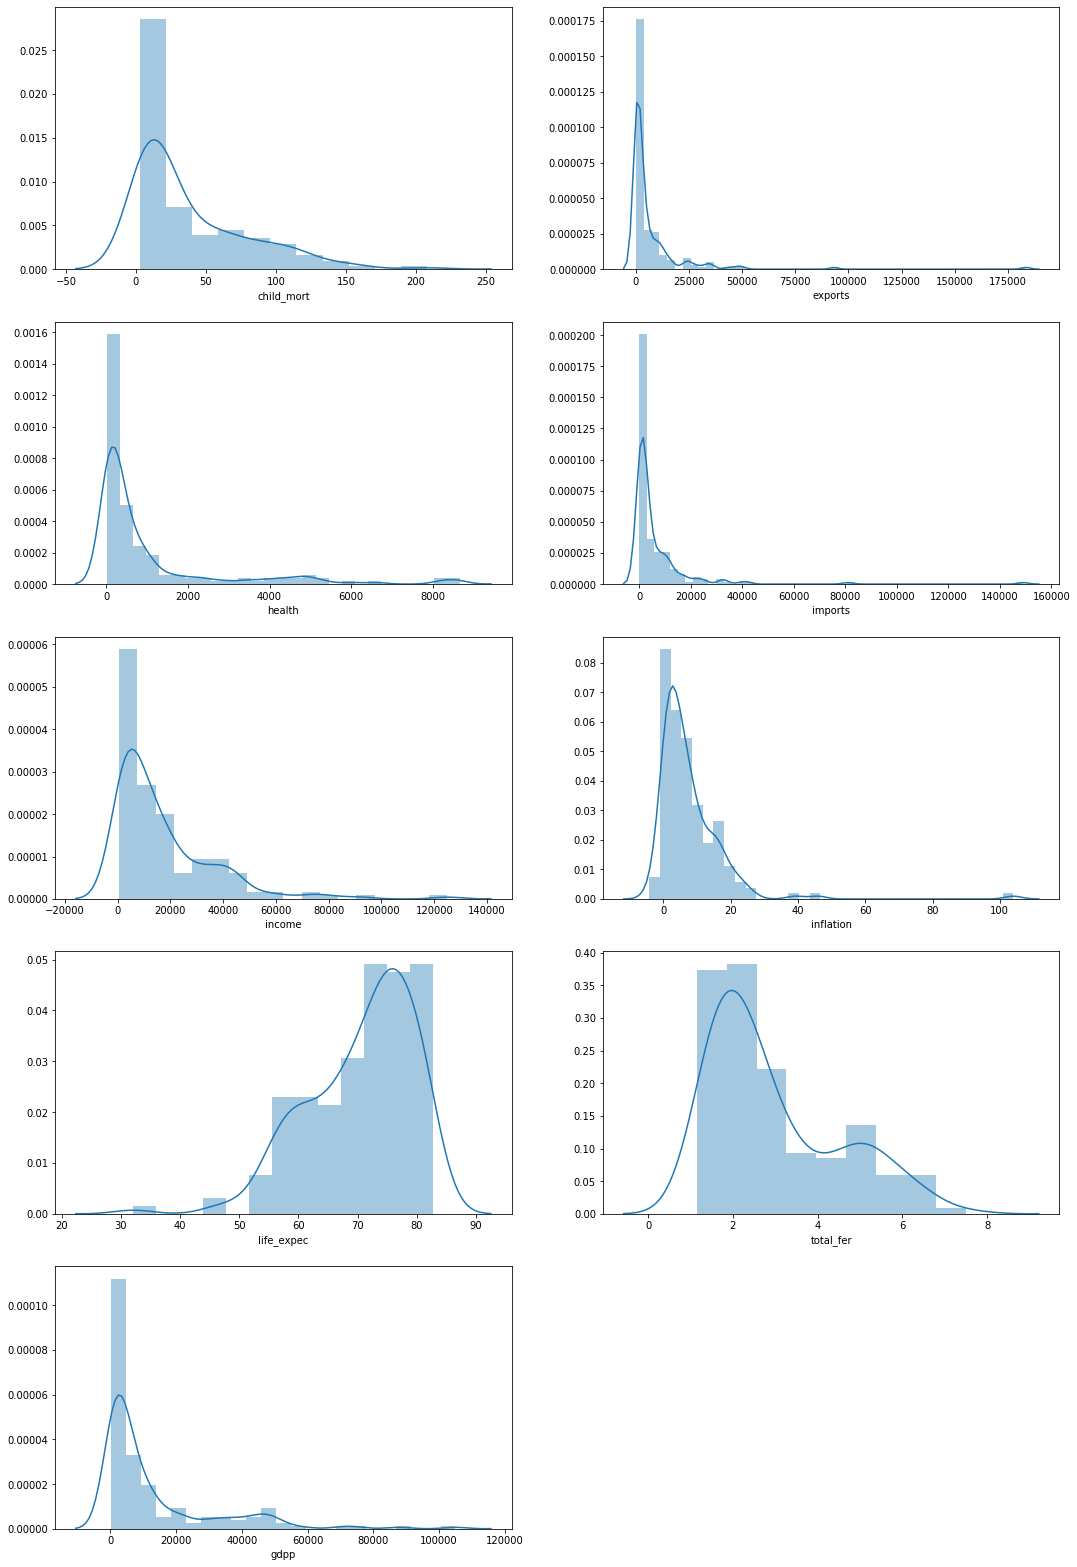

In [10]:
# Let's check how data is distributed with the help of histogram

plt.figure(figsize=(18,28))
feature = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(feature):
    plt.subplot(5,2,i[0]+1)
    sns.distplot(help_df[i[1]])

#For child_mort most of the data count is between 0 to 50 death of children under 5 years of age per 1000 live births
#For exports most of the data count is between 0 to 10000.
#For health most of the data count is between 0 to 1000 i.e. total health spending per capita.
#For imports most of the data count is between 0 to 10000.
#For income most of the data count is between 0 to 20000 i.e. Net income per person.
#For inflation most of the data count is between 0 to 10, which is growing as per the growth rate of the gdpp.
#For life_expec most of the data count is between 70 to 80 years which is the average number of years a new born child would live if the current mortality patterns are to remain the same
#For total_fer most of the data count is between 1 to 3 children i.e the number of children that would be born to each woman if the current age-fertility rates remain the same.
#For gdpp most of the data count is between 0 to 10000.

Let's also go through some multivariate analysis with the help of heatmap and pairplot and check how different features are related to each other.

##### MULTIVARIATE ANALYSIS

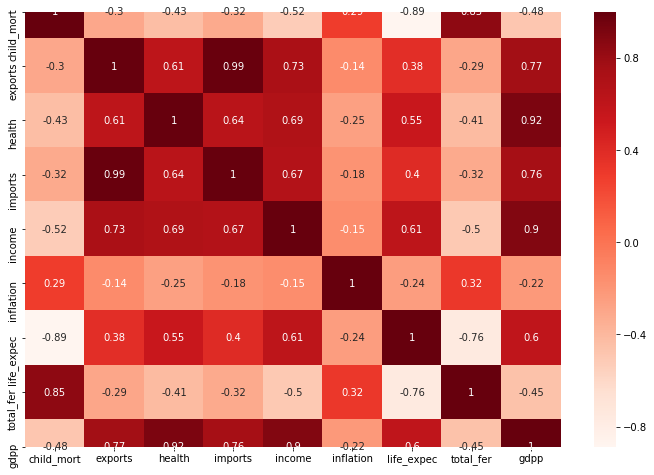

In [11]:
# HEATMAP

# First let's go with heatmap and check nthe correlation between the variables

corr_list = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

plt.figure(figsize=(12,8))
sns.heatmap(help_df[corr_list].corr(), annot=True, cmap='Reds')

With the help of heatmap we can visualise that 'total_fer' is highly correlated to child_mort, 'import' is highly correlated to 'exports', 'income' is highly correlated to 'gdpp', 'health' is also highly correlated to 'gdpp'

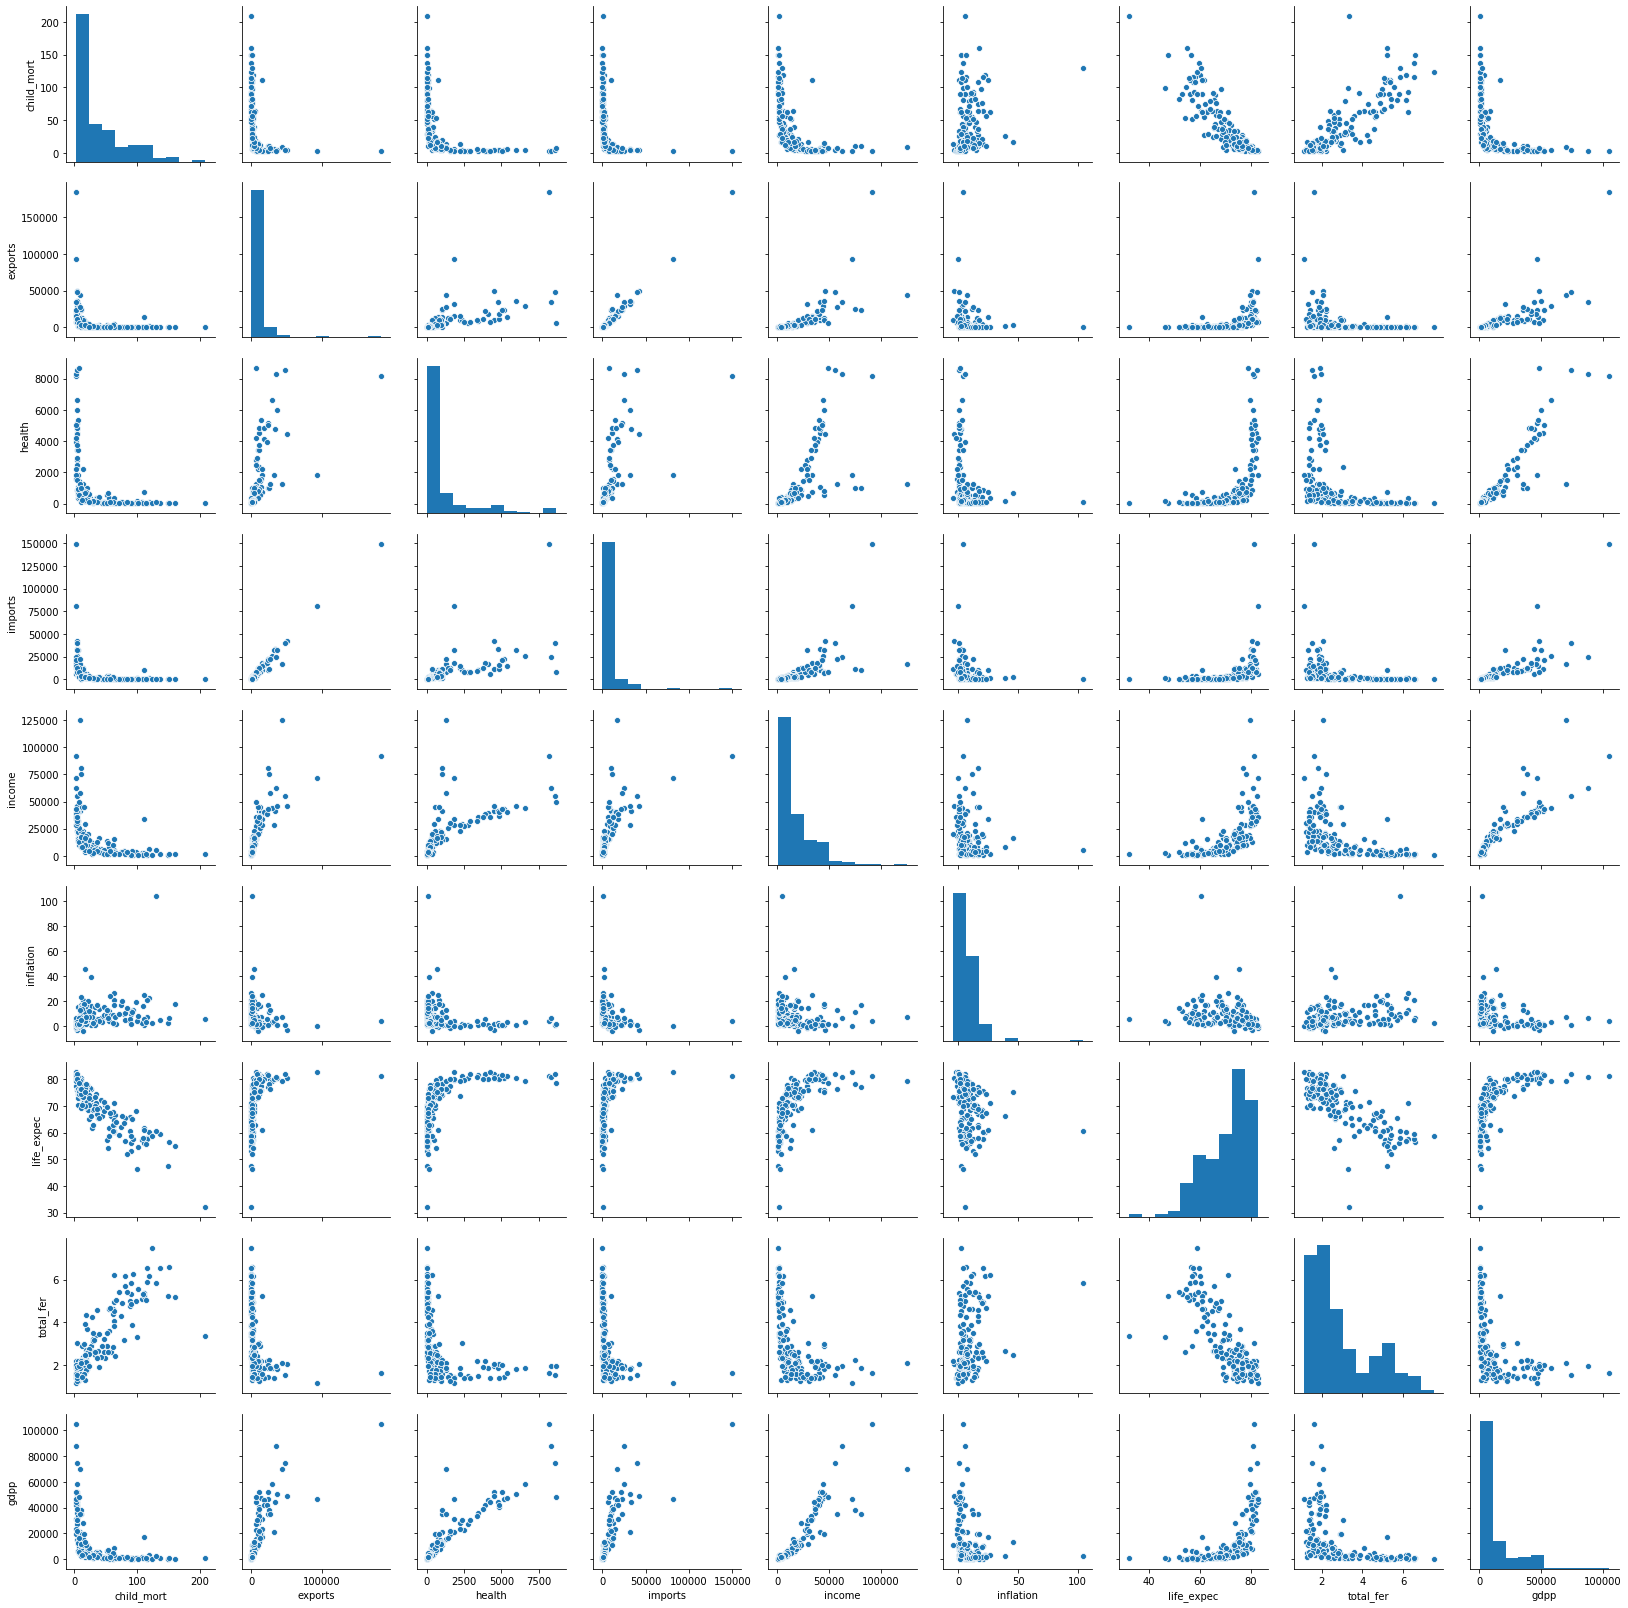

In [12]:
# PAIRPLOT

# Now, we will see the pairplot and visualize the scatterplot.
# It will show the outliers in the features and linear relationship between the variables.

sns.pairplot(data=help_df, vars=corr_list)
plt.show()

From the pairplot, with the help of scatterplot we can see the linear relationship between 'child_mort' and 'total_fer', 'exports' and 'imports', 'health' and 'gdpp', 'health' and 'income', 'income' and 'gdpp'.

There are also lots of outliers in all the features as we can clearly see it from the scatterplot. So, we will again visualize the outliers using boxplot and look for the treatment of those outliers, either leave them or remove them or capp them.

##### CHECKING  OUTLIERS

In [13]:
# check the quantiles to analyze the outliers

help_df.quantile([0.25, 0.5, 0.75, 0.95, 0.99, 1])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0.25,8.25,447.14,78.5355,640.215,3355.0,1.810,65.30,1.7950,1330.0
0.50,19.30,1777.44,321.8860,2045.580,9960.0,5.390,73.10,2.4100,4660.0
0.75,62.10,7278.00,976.9400,7719.600,22800.0,10.750,76.80,3.8800,14050.0
0.95,116.00,31385.10,4966.7010,24241.560,48290.0,20.870,81.40,5.8610,48610.0
0.99,153.40,64794.26,8410.3304,55371.390,84374.0,41.478,82.37,6.5636,79088.0
1.00,208.00,183750.00,8663.6000,149100.000,125000.0,104.000,82.80,7.4900,105000.0


To get much better view of the outliers let's plot BOXPLOTS for all the variables.

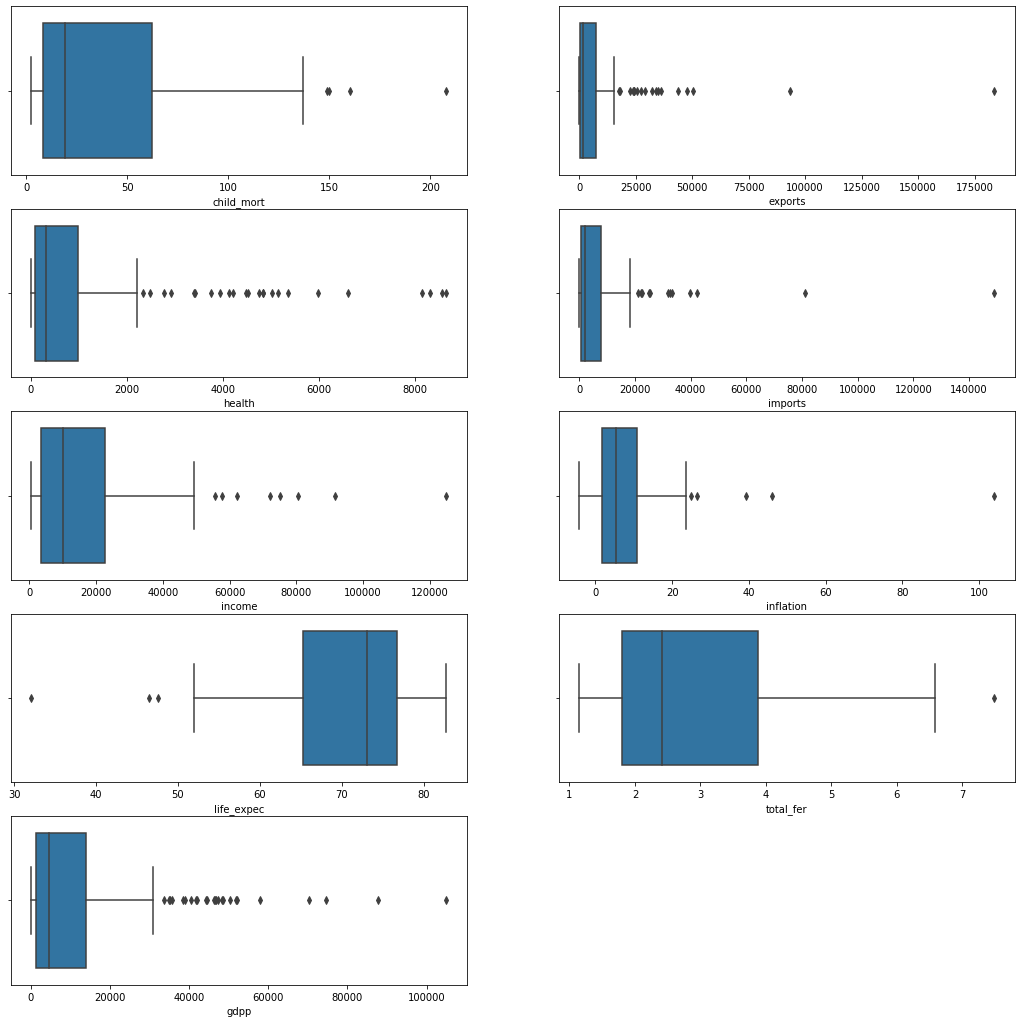

In [14]:
# BOXPLOT

# Let's check the boxplot for the outliers

plt.figure(figsize=(18,18))
feature = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(feature):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(help_df[i[1]])

With the help of BOXPLOT we can clearly see that there are lots of outliers in every features. So, now we need to treat these outliers. But most of these outliers seems logically correct. So, we will not remove the outliers but just do the capping. Capping the outliers on 95% to 100% seems OK, below 95% it will become harsh and we might lose some important datas. So, we will keep it between 5% to 95%. 

In this task our main aim is to find the countries who are in direst need of aid. So, our main aim is to focus on those countries whose economic, health and social conditions are not good. So, we need to do capping keeping in mind these points.

##### TREATING OUTLIERS

In 2 features like 'child_mort' and 'total_fer', there are very less outliers and those seems logically correct values. So, we will not cap these feature. For rest we will capp below 5% and above 95%.

In [15]:
# Assigining variables for capping

exports_q1 = help_df['exports'].quantile(0.05)
exports_q4 = help_df['exports'].quantile(0.95)

health_q1 = help_df['health'].quantile(0.05)
health_q4 = help_df['health'].quantile(0.95)

imports_q1 = help_df['imports'].quantile(0.05)
imports_q4 = help_df['imports'].quantile(0.95)

income_q1 = help_df['income'].quantile(0.05)
income_q4 = help_df['income'].quantile(0.95)

inflation_q1 = help_df['inflation'].quantile(0.04)
inflation_q4 = help_df['inflation'].quantile(0.96)

life_q1 = help_df['life_expec'].quantile(0.01) 

gdpp_q1 = help_df['gdpp'].quantile(0.05)
gdpp_q4 = help_df['gdpp'].quantile(0.95)

In [16]:
# CAPPING the outliers

help_df['exports'][help_df['exports']<=exports_q1]=exports_q1
help_df['exports'][help_df['exports']>=exports_q4]=exports_q4


help_df['health'][help_df['health']<=health_q1]=health_q1
help_df['health'][help_df['health']>=health_q4]=health_q4


help_df['imports'][help_df['imports']<=imports_q1]=imports_q1
help_df['imports'][help_df['imports']>=imports_q4]=imports_q4


help_df['income'][help_df['income']<=income_q1]=income_q1
help_df['income'][help_df['income']>=income_q4]=income_q4


help_df['inflation'][help_df['inflation']<=inflation_q1]=inflation_q1
help_df['inflation'][help_df['inflation']>=inflation_q4]=inflation_q4


help_df['life_expec'][help_df['life_expec']<=life_q1]=life_q1


help_df['gdpp'][help_df['gdpp']<=gdpp_q1]=gdpp_q1
help_df['gdpp'][help_df['gdpp']>=gdpp_q4]=gdpp_q4

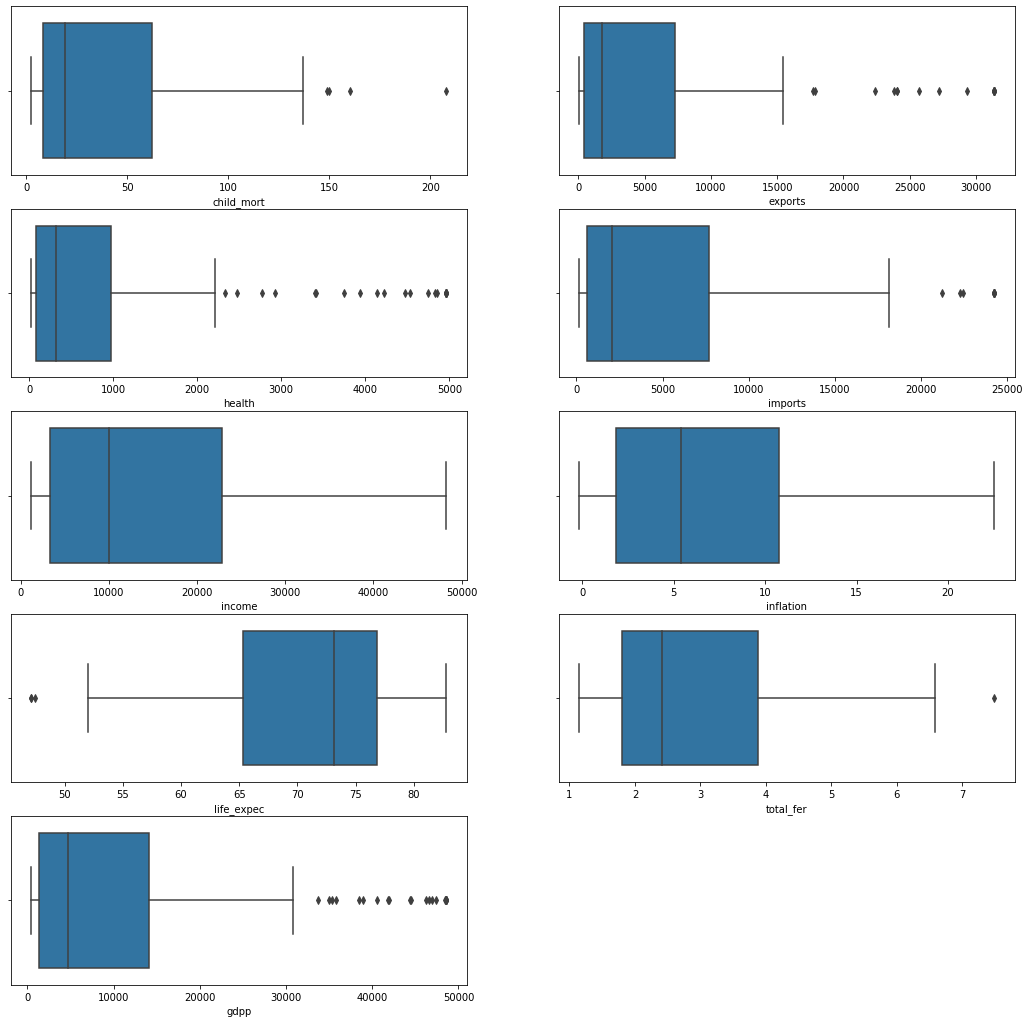

In [17]:
# BOXPLOT after capping.

# Let's check the boxplots after capping the outliers

plt.figure(figsize=(18,18))
feature = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(feature):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(help_df[i[1]])

So, after analyzing the BOXPLOTS for different features visually after CAPPING we can see that lots of OUTLIERS have been capped, and whatever remains seems logically correct value. 

So, now our datset is clean and ready to be prepared for CLUSTERING.

# Data Preparation

Now here we will prepare the data for clustering and the first step that we will follow is Scaling, so that every feature and every value weigh same and comparision will be unbiased.

In [18]:
# Let's first copy our original dataset which we will later use while doing cluster profiling.

help_df1 = help_df.copy()

In [19]:
# SCALING

# We will scale the following numerical features form original help_df dataset:-
#'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'

scale = StandardScaler()
help_list = help_df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]
help_df2 = scale.fit_transform(help_list)

In [20]:
# check help_df2
help_df2

array([[ 1.29153238, -0.66803864, -0.62977844, ..., -1.69307077,
         1.90288227, -0.7578739 ],
       [-0.5389489 , -0.54238923, -0.47380714, ...,  0.66202581,
        -0.85997281, -0.52377507],
       [-0.27283273, -0.47604845, -0.53034406, ...,  0.6854596 ,
        -0.0384044 , -0.49928636],
       ...,
       [-0.37231541, -0.56600553, -0.59686482, ...,  0.28708506,
        -0.66120626, -0.70777132],
       [ 0.44841668, -0.63033074, -0.61187406, ..., -0.36906125,
         1.14094382, -0.70777132],
       [ 1.11495062, -0.61312123, -0.59935647, ..., -2.1851805 ,
         1.6246091 , -0.69784347]])

In [21]:
# We can see that help_df2 is in array form.
# So, we will convert it to dataframe

help_df2 = pd.DataFrame(help_df2)
help_df2.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
help_df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.668039,-0.629778,-0.733291,-0.960575,0.365783,-1.693071,1.902882,-0.757874
1,-0.538949,-0.542389,-0.473807,-0.472674,-0.395590,-0.401178,0.662026,-0.859973,-0.523775
2,-0.272833,-0.476048,-0.530344,-0.560668,-0.193907,1.397695,0.685460,-0.038404,-0.499286
3,2.007808,-0.419165,-0.589272,-0.543598,-0.669255,2.373827,-1.236112,2.128151,-0.560839
4,-0.695634,-0.027297,-0.150953,0.306143,0.227115,-0.873750,0.720610,-0.541946,0.012991


Now we have got a perfectly scaled dataset 'help_df2' on which we will first check the clustering tendency with the help of Hopkin's statistics and then cluster the data in different segments using K-MEAN and HIERARCHICAL CLUSTERING.

Score of Hopkin's statistics will tell us wheather the data is feasible for clustering or not.

In [22]:
# HOPKIN'S STATISTICS

# Now, let's access Hopkin's statistics to check if the given dataset is suitable for clustering or not.


from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [23]:
hopkins(help_df2)

0.8601974278893512

Here we have got a very good value which gives us confidence that we can go ahead and do the clustering, as our data will have meaningful clusters and not the random one.

# Clustering
### K-MEANS

##### Finding optimal number of clusters

Here we will try to find out optimal number of K i.e. number of clusters. And we will use two method for the same - 1) Silhouette_score and other one is elbow curve. 

First let's go ahead with Silhouette_score - The silhouette value is a measure of how similar an object is to its own cluster compared to other clusters and its value ranges from -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [24]:
# 1) Silhouette

ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k, max_iter=50).fit(help_df2)
    ss.append([k, silhouette_score(help_df2, kmeans.labels_)])
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(help_df2, cluster_labels)
    print("For n_clusters={0}, the silhouette_score is{1}".format(k, silhouette_avg))

For n_clusters=2, the silhouette_score is0.4833805598500006
For n_clusters=3, the silhouette_score is0.4106070423302363
For n_clusters=4, the silhouette_score is0.3789685384364217
For n_clusters=5, the silhouette_score is0.35634542594119384
For n_clusters=6, the silhouette_score is0.3035060551235968
For n_clusters=7, the silhouette_score is0.3252962572822592
For n_clusters=8, the silhouette_score is0.33798244539267924
For n_clusters=9, the silhouette_score is0.3274136971070391


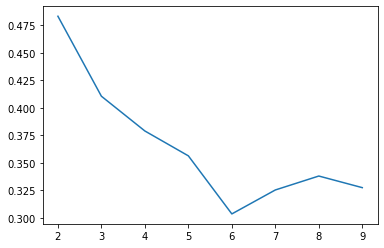

In [25]:
# Let's also visualize the curve at different scores that how it is changing.

plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

Here we can see that Silhouette_score is high at k=2 and k=3. Higher the score highly appropriate is the clustering configuration. From the plot also k=3 seems a good value. 

Now let's check the ELBOW CURVE and compare both i.e. the Silhouette_score and elbow curve.

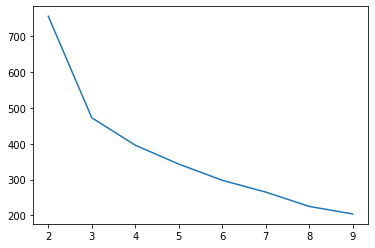

In [26]:
# 2) elbow curve/ssd

ssd = []
for k in range(2,10):
    model = KMeans(n_clusters = k, max_iter=50).fit(help_df2)
    ssd.append([k, model.inertia_])
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

Here again from the plot we can see that a sharp elbow is forming at k=3. So, after comparing both i.e Silhouette_score and elbow curve, k=3 seems to be optimal number for the clusters. 

In [27]:
# Let's go ahead with k=3
# final model with k=3

kmeans = KMeans(n_clusters=3, random_state=50)
kmeans.fit(help_df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [28]:
# read the labels

kmeans.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [29]:
# assign the labels to the copied dataset 'help_df1' in the column 'cluster_id' and read the dataset again

help_df1['cluster_id'] = kmeans.labels_
help_df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


##### CLUSTER PROFILING AND VISUALIZATION OF THE FEATURES BETWEEN CLUSTERS

In [30]:
# Now check the sum of countries distributed within different clusters

help_df1.cluster_id.value_counts()

1    82
2    48
0    37
Name: cluster_id, dtype: int64

Here we can see the number of countries distributed in different clusters. We can also visualize the values of different features using the bar plot.

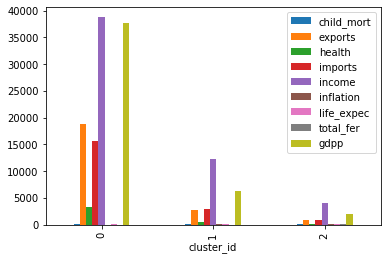

In [31]:
# Ploting BARPLOT which shows the values of different features within clusters

help_df1.drop('country', axis=1).groupby('cluster_id').mean().plot(kind='bar')
plt.show()

Values of gdpp, income, imports and exports are heigher in cluster_0 which consists of least number of countries, followed by cluster_1 and cluster_2.

gdpp, child_mort and income are the three most important feature which clearly reflect the social, economic and health condition of a particular country. We can analyse the clusters to get the desired result by comparing how these three variables vary. We will visualize how these three variables changes in different clusters.

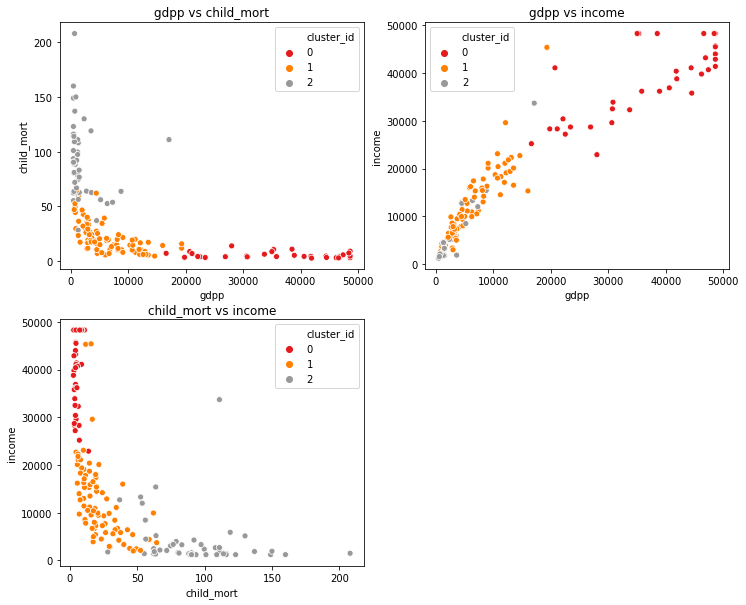

In [32]:
# visualisations on the clusters with the help of plotting a scatter plot of all the countries and differentiating the clusters

# SCATTER PLOT

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id', data=help_df1, palette='Set1')
plt.title("gdpp vs child_mort")

plt.subplot(2,2,2)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id', data=help_df1, palette='Set1')
plt.title("gdpp vs income")

plt.subplot(2,2,3)
sns.scatterplot(x='child_mort', y='income', hue='cluster_id', data=help_df1, palette='Set1')
plt.title("child_mort vs income")
plt.show()

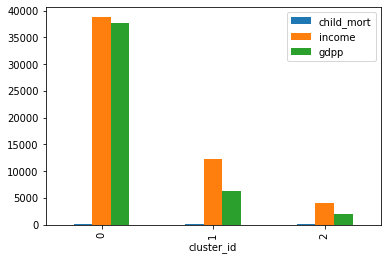

In [33]:
# visualisations on the clusters with the help of plotting a bar plot of all the countries and differentiating the clusters

# BAR PLOT

help_df1[['child_mort', 'income', 'gdpp', 'cluster_id']].groupby('cluster_id').mean().plot(kind='bar')

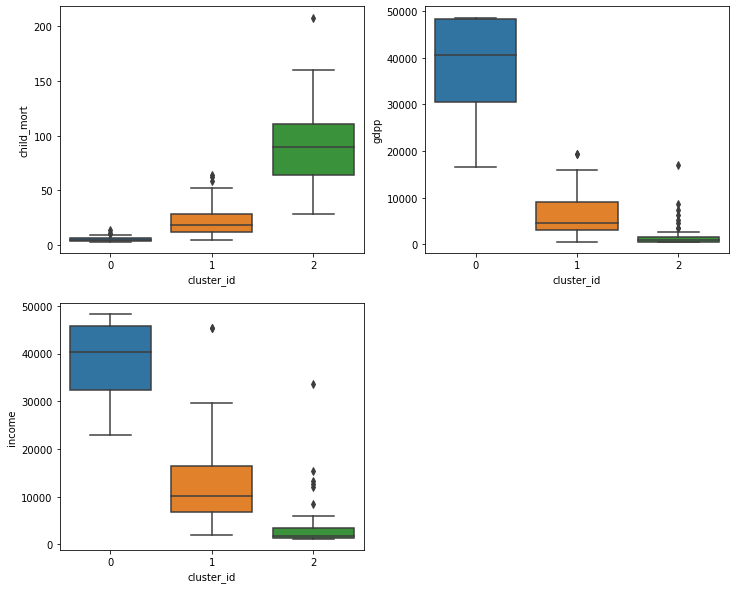

In [34]:
# visualisations on the clusters with the help of plotting a box plot of all the countries and differentiating the clusters

# BOX PLOT

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='cluster_id', y='child_mort', data = help_df1)
plt.subplot(2,2,2)
sns.boxplot(x='cluster_id', y='gdpp', data = help_df1)
plt.subplot(2,2,3)
sns.boxplot(x='cluster_id', y='income', data = help_df1)
plt.show()

So, we visualized the scatter plot, bar plot and box plot for the three clusters and got the idea that how gdpp, child_mort and income range varies from one cluster to another.

In cluster_0 the range of income and gdpp are the highest and child_mort are the lowest and this cluster consists of least number of countries. cluster_0 is followed by cluster_1 and cluster_1 is followed by cluster_2 which consists of countries that has least gdpp, income and high child_mort rate. Hence, the countries on which our whole focus should be is in cluster_2.

Now, let's sort the countries with respect of 'gdpp', 'child_mort', 'income', where 'gdpp' is lowest, 'child_mort' is high and 'income' is lowers. This will give us the list of countries that are in direst need of aid. We can also change the order of 'gdpp', 'child_mort', 'income', which will give us different result and can come both the results and decide accordingly.

In [35]:
# sorting of top 10 countries with respect to 'gdpp', 'child_mort', 'income'.

help_df1[help_df1['cluster_id']==2].sort_values(by=['gdpp', 'child_mort', 'income'], ascending=[True, False, True]).head(6)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
132,Sierra Leone,160.0,70.4688,52.26900,169.281,1220.0,17.20,55.0,5.20,465.9,2
31,Central African Republic,149.0,70.4688,26.71592,169.281,1213.0,2.01,47.5,5.21,465.9,2
112,Niger,123.0,77.2560,26.71592,170.868,1213.0,2.55,58.8,7.49,465.9,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.71592,169.281,1213.0,20.80,57.5,6.54,465.9,2
106,Mozambique,101.0,131.9850,26.71592,193.578,1213.0,7.64,54.5,5.56,465.9,2
26,Burundi,93.6,70.4688,26.79600,169.281,1213.0,12.30,57.7,6.26,465.9,2


So, right now top 5 countries that we are getting where gdpp and income are lowest and child_mort is high are:- Sierra Leone, Central African Republic, Niger, Congo, Dem. Rep, Mozambique.

Further we will do more analysis but first let's do the HIERARCHICAL CLUSTERING to get more precise clusters distribution.

### Hierarchical Clustering

In [36]:
# read the scaled dataframe

help_df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.668039,-0.629778,-0.733291,-0.960575,0.365783,-1.693071,1.902882,-0.757874
1,-0.538949,-0.542389,-0.473807,-0.472674,-0.395590,-0.401178,0.662026,-0.859973,-0.523775
2,-0.272833,-0.476048,-0.530344,-0.560668,-0.193907,1.397695,0.685460,-0.038404,-0.499286
3,2.007808,-0.419165,-0.589272,-0.543598,-0.669255,2.373827,-1.236112,2.128151,-0.560839
4,-0.695634,-0.027297,-0.150953,0.306143,0.227115,-0.873750,0.720610,-0.541946,0.012991


In [37]:
# read the unscaled dataframe with original values, which has cluster_id from K-Means clustering

help_df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


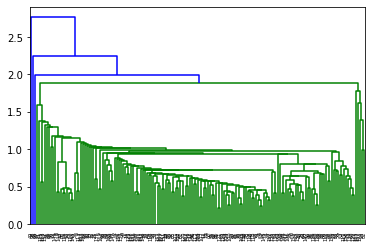

In [38]:
# Single linkage dendrogram

merging = linkage(help_df2, method='single', metric='euclidean')
dendrogram(merging)
plt.show()

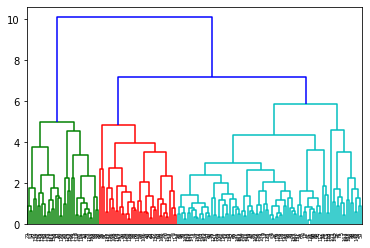

In [39]:
# complete linkage dendrogram

merging=linkage(help_df2, method='complete', metric='euclidean')
dendrogram(merging)
plt.show()

Here also with the help of dendrogram we can see that 3 clusters are optimal in this case also.

In [40]:
# Let's check the labels generated with clusters = 3

cluster_label = cut_tree(merging, n_clusters=3).reshape(-1, )
cluster_label

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0])

In [41]:
# assign the cluster_label to the copied dataset 'help_df1' in the column 'cluster_label' and read the dataset again

help_df1['cluster_label'] = cluster_label
help_df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_label
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,1
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,1
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,1


In [42]:
# Check the sum of countries distributed within different clusters

help_df1.cluster_label.value_counts()

1    92
0    39
2    36
Name: cluster_label, dtype: int64

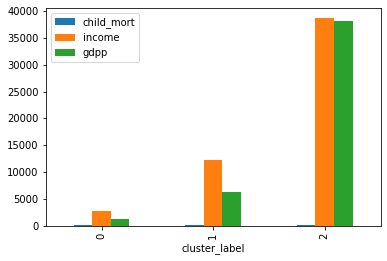

In [43]:
# visualisations on the clusters with the help of plotting a bar plot of all the countries and differentiating the clusters

# BAR PLOT

help_df1[['child_mort', 'income', 'gdpp', 'cluster_label']].groupby('cluster_label').mean().plot(kind='bar')

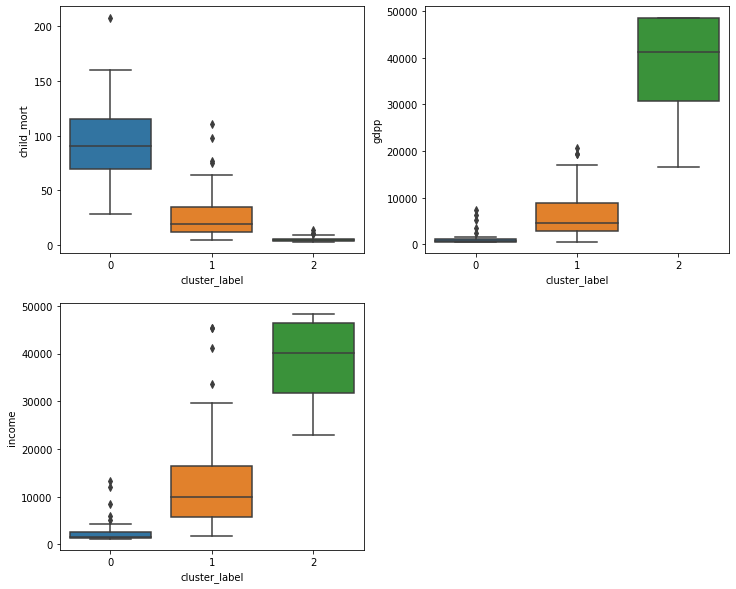

In [44]:
# visualisations on the clusters with the help of plotting a Boxplot of all the countries and differentiating the clusters

# BOXPLOT

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='cluster_label', y='child_mort', data = help_df1)
plt.subplot(2,2,2)
sns.boxplot(x='cluster_label', y='gdpp', data = help_df1)
plt.subplot(2,2,3)
sns.boxplot(x='cluster_label', y='income', data = help_df1)
plt.show()

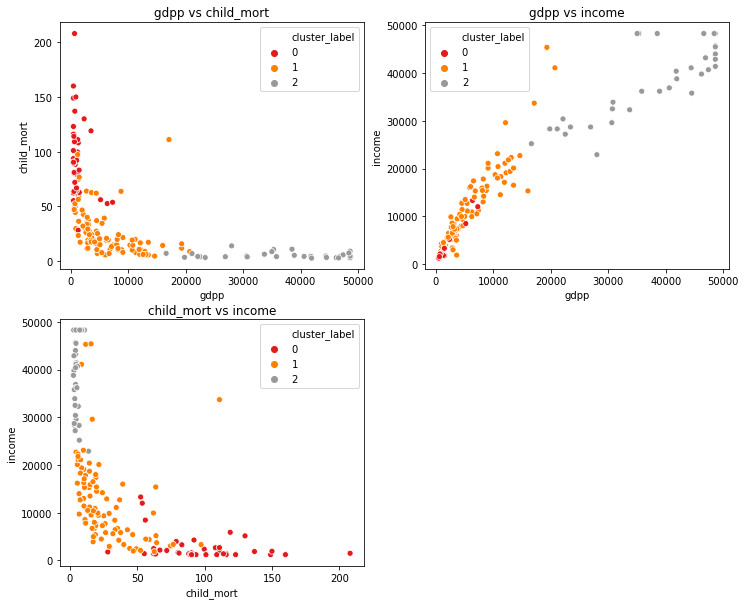

In [45]:
# visualisations on the clusters with the help of plotting a scatter plot of all the countries and differentiating the clusters

# SCATTER PLOT

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_label', data=help_df1, palette='Set1')
plt.title("gdpp vs child_mort")

plt.subplot(2,2,2)
sns.scatterplot(x='gdpp', y='income', hue='cluster_label', data=help_df1, palette='Set1')
plt.title("gdpp vs income")

plt.subplot(2,2,3)
sns.scatterplot(x='child_mort', y='income', hue='cluster_label', data=help_df1, palette='Set1')
plt.title("child_mort vs income")

plt.show()

So, we visualized the scatter plot, bar plot and box plot for the three clusters and got the idea that how gdpp, child_mort and income range varies from one cluster to another.

In cluster_label_2 the range of income and gdpp are the highest and child_mort are the lowest and this cluster consists of least number of countries. cluster_label_2 is followed by cluster_label_1 and cluster_label_1 is followed by cluster_label_0 which consists of countries that has least gdpp, income and high child_mort rate. Hence, the countries on which our whole focus should be is in cluster_label_0.

Now, let's sort the countries with respect of 'gdpp', 'child_mort', 'income', where 'gdpp' is lowest, 'child_mort' is high and 'income' is lowers. This will give us the list of countries that are in direst need of aid. We can also change the order of 'gdpp', 'child_mort', 'income', which will give us different result and we can compare both the results and decide accordingly.

In [46]:
# sorting of countries with respect to 'gdpp', 'child_mort', 'income'.

help_df1[help_df1['cluster_label']==0].sort_values(by=['gdpp', 'child_mort', 'income'], ascending=[True, False, True]).head(6)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_label
132,Sierra Leone,160.0,70.4688,52.26900,169.281,1220.0,17.20,55.0,5.20,465.9,2,0
31,Central African Republic,149.0,70.4688,26.71592,169.281,1213.0,2.01,47.5,5.21,465.9,2,0
112,Niger,123.0,77.2560,26.71592,170.868,1213.0,2.55,58.8,7.49,465.9,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.71592,169.281,1213.0,20.80,57.5,6.54,465.9,2,0
106,Mozambique,101.0,131.9850,26.71592,193.578,1213.0,7.64,54.5,5.56,465.9,2,0
26,Burundi,93.6,70.4688,26.79600,169.281,1213.0,12.30,57.7,6.26,465.9,2,0


In [47]:
# sorting of countries with respect to 'child_mort', 'gdpp', 'income'.

help_df1[help_df1['cluster_label']==0].sort_values(by=['child_mort', 'gdpp', 'income'], ascending=[False, True, True]).head(6)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_label
66,Haiti,208.0,101.2860,45.74420,428.314,1500.0,5.450,47.16,3.33,662.0,2,0
132,Sierra Leone,160.0,70.4688,52.26900,169.281,1220.0,17.200,55.00,5.20,465.9,2,0
32,Chad,150.0,330.0960,40.63410,390.195,1930.0,6.390,56.50,6.59,897.0,2,0
31,Central African Republic,149.0,70.4688,26.71592,169.281,1213.0,2.010,47.50,5.21,465.9,2,0
97,Mali,137.0,161.4240,35.25840,248.508,1870.0,4.370,59.50,6.55,708.0,2,0
113,Nigeria,130.0,589.4900,118.13100,405.420,5150.0,22.544,60.50,5.84,2330.0,2,0


In [48]:
# sorting of countries with respect to 'gdpp', 'income', 'child_mort'.

help_df1[help_df1['cluster_label']==0].sort_values(by=['gdpp', 'income', 'child_mort'], ascending=[True, True, False]).head(6)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_label
31,Central African Republic,149.0,70.4688,26.71592,169.281,1213.0,2.01,47.5,5.21,465.9,2,0
112,Niger,123.0,77.2560,26.71592,170.868,1213.0,2.55,58.8,7.49,465.9,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.71592,169.281,1213.0,20.80,57.5,6.54,465.9,2,0
106,Mozambique,101.0,131.9850,26.71592,193.578,1213.0,7.64,54.5,5.56,465.9,2,0
26,Burundi,93.6,70.4688,26.79600,169.281,1213.0,12.30,57.7,6.26,465.9,2,0
94,Malawi,90.5,104.6520,30.24810,169.281,1213.0,12.10,53.1,5.31,465.9,2,0


In [49]:
# sorting of countries with respect to 'income', 'child_mort', 'gdpp'.

help_df1[help_df1['cluster_label']==0].sort_values(by=['income', 'child_mort', 'gdpp'], ascending=[True, False, True]).head(6)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_label
31,Central African Republic,149.0,70.4688,26.71592,169.281,1213.0,2.01,47.5,5.21,465.9,2,0
112,Niger,123.0,77.2560,26.71592,170.868,1213.0,2.55,58.8,7.49,465.9,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.71592,169.281,1213.0,20.80,57.5,6.54,465.9,2,0
63,Guinea,109.0,196.3440,31.94640,279.936,1213.0,16.10,58.0,5.34,648.0,2,0
106,Mozambique,101.0,131.9850,26.71592,193.578,1213.0,7.64,54.5,5.56,465.9,2,0
26,Burundi,93.6,70.4688,26.79600,169.281,1213.0,12.30,57.7,6.26,465.9,2,0


In [50]:
# sorting of countries with respect to 'child_mort', 'income', 'gdpp'.

help_df1[help_df1['cluster_label']==0].sort_values(by=['child_mort', 'income', 'gdpp'], ascending=[False, True, True]).head(6)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_label
66,Haiti,208.0,101.2860,45.74420,428.314,1500.0,5.450,47.16,3.33,662.0,2,0
132,Sierra Leone,160.0,70.4688,52.26900,169.281,1220.0,17.200,55.00,5.20,465.9,2,0
32,Chad,150.0,330.0960,40.63410,390.195,1930.0,6.390,56.50,6.59,897.0,2,0
31,Central African Republic,149.0,70.4688,26.71592,169.281,1213.0,2.010,47.50,5.21,465.9,2,0
97,Mali,137.0,161.4240,35.25840,248.508,1870.0,4.370,59.50,6.55,708.0,2,0
113,Nigeria,130.0,589.4900,118.13100,405.420,5150.0,22.544,60.50,5.84,2330.0,2,0


In [51]:
# sorting of countries with respect to 'income', 'gdpp', 'child_mort'.

help_df1[help_df1['cluster_label']==0].sort_values(by=['income', 'gdpp', 'child_mort'], ascending=[True, True, False]).head(6)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_label
31,Central African Republic,149.0,70.4688,26.71592,169.281,1213.0,2.01,47.5,5.21,465.9,2,0
112,Niger,123.0,77.2560,26.71592,170.868,1213.0,2.55,58.8,7.49,465.9,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.71592,169.281,1213.0,20.80,57.5,6.54,465.9,2,0
106,Mozambique,101.0,131.9850,26.71592,193.578,1213.0,7.64,54.5,5.56,465.9,2,0
26,Burundi,93.6,70.4688,26.79600,169.281,1213.0,12.30,57.7,6.26,465.9,2,0
94,Malawi,90.5,104.6520,30.24810,169.281,1213.0,12.10,53.1,5.31,465.9,2,0


We have sorted the data with respect to 'income', 'gdpp', 'child_mort', and we have changed the sequence of these 3 variables 6 times and analysed the top 5 countries. Everytime we get different results.

Following are the top 5 countries that we sorted according to these parameters:-
    #1) Central African Republic
    #2) Niger
    #3) Congo, Dem. Rep.
    #4) Mozambique
    #5) Sierre Leone